Likelihood of Heartattack Model Prediction Training with SVC Linear

In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import sqlite3

# Imports for saving model as pickle file (.pkl format)
import pickle
import joblib



In [2]:
# Create SQLite database connection, 
# retrieving file from Sqlite_Heart_Database Folder
conn = sqlite3.connect("Sqlite_Heart_Database/Heart.sqlite")

# Creating and reading the DataFrame using the data in SQL 
query = "SELECT * FROM table_1"
df = pd.read_sql_query(query, conn)

# Closing the database connection
conn.close()

# Review the dataframe
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Correlation Matrix
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [4]:
# Graph correlation matrix

In [5]:
# Get the target variables, here it is the liklihood of an heartattack, which is
# decribed in column, "output" 
y = df["output"]
class_names = ["No Heart Disease", "Heart Disease"]

In [6]:
# Get the features, by dropping the target from the original dataframe 
X = df.drop("output", axis=1)
feature_names = X.columns

In [7]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

SVC Linear Model Setup and Training

In [8]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.868


In [10]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
report = classification_report(y_test, predictions, target_names=class_names)
print(report)

                  precision    recall  f1-score   support

No Heart Disease       0.88      0.83      0.85        35
   Heart Disease       0.86      0.90      0.88        41

        accuracy                           0.87        76
       macro avg       0.87      0.87      0.87        76
    weighted avg       0.87      0.87      0.87        76



In [11]:
# X_test 
# test_predict = [59, 1, 3, 170, 288,	0, 0, 159, 0, 0.2, 1, 0, 3]

# model.predict(test_predict)


Make Predictions

In [12]:
# Compare the Predicted and Actual Values of the Model 
actual_data_predicted = pd.DataFrame({"Prediction": predictions, "Actual": y_test})

actual_data_predicted.head(5)

,Prediction,Actual
179,0,0
228,1,0
111,1,1
246,0,0
60,1,1


Confusion Matrix

['No Heart Disease', 'Heart Disease']
[0 1]


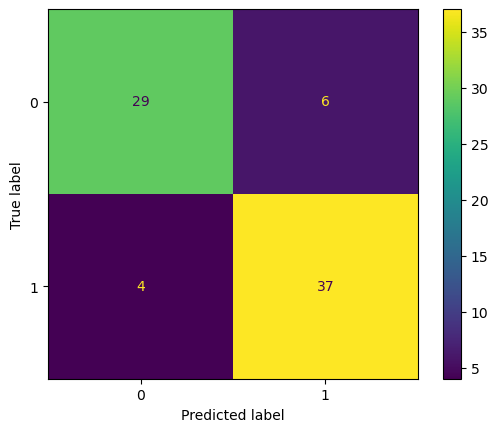

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
print(class_names)
print(model.classes_)
plt.show()

plt.savefig("static/Confusion_Matrix.png")

Visual for True Positive Case with Trained Model

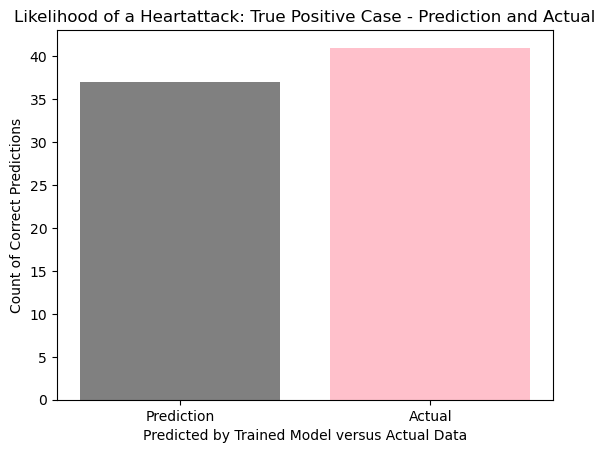

<Figure size 640x480 with 0 Axes>

In [14]:
# True Positive Case

true_positive_case = len(actual_data_predicted[(actual_data_predicted['Prediction'] == 1) & (actual_data_predicted['Actual'] == 1)])

# Count the number of rows where Actual=1 (regardless of Prediction)
actual_positive_case = len(actual_data_predicted[actual_data_predicted['Actual'] == 1])

# Create a bar graph with two bars
categories = ['Prediction', 'Actual']
counts = [true_positive_case, actual_positive_case]

plt.bar(categories, counts, color=['grey', 'pink'])
plt.xlabel('Predicted by Trained Model versus Actual Data')
plt.ylabel('Count of Correct Predictions')
plt.title('Likelihood of a Heartattack: True Positive Case - Prediction and Actual')
plt.show()

plt.savefig("static/true_positive_case.png")

True Negative Case

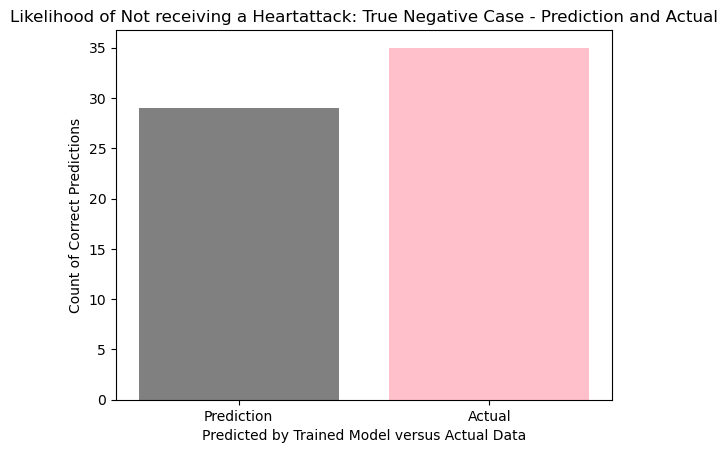

<Figure size 640x480 with 0 Axes>

In [15]:
# True Negative Case

true_negative_case = len(actual_data_predicted[(actual_data_predicted['Prediction'] == 0) & (actual_data_predicted['Actual'] == 0)])

# Count the number of rows where Actual=1 (regardless of Prediction)
actual_negative_case = len(actual_data_predicted[actual_data_predicted['Actual'] == 0])

# Create a bar graph with two bars
categories = ['Prediction', 'Actual']
counts = [true_negative_case, actual_negative_case]

plt.bar(categories, counts, color=['grey', 'pink'])
plt.xlabel('Predicted by Trained Model versus Actual Data')
plt.ylabel('Count of Correct Predictions')
plt.title('Likelihood of Not receiving a Heartattack: True Negative Case - Prediction and Actual')
plt.show()

plt.savefig("static/true_negative_case.png")

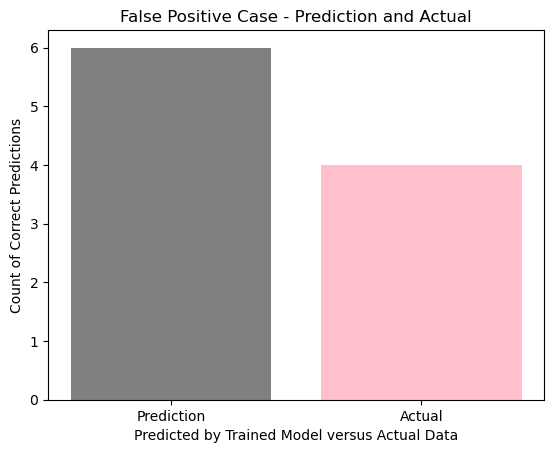

<Figure size 640x480 with 0 Axes>

In [16]:


# False Positive Case

false_positive_case = len(actual_data_predicted[(actual_data_predicted['Prediction'] == 1) & (actual_data_predicted['Actual'] == 0)])

# Count the number of rows where Actual=1 (regardless of Prediction)
actual_false_positive_case = len(actual_data_predicted[(actual_data_predicted['Prediction'] == 0) & (actual_data_predicted['Actual'] == 1)])

# Create a bar graph with two bars
categories = ['Prediction', 'Actual']
counts = [false_positive_case, actual_false_positive_case]

plt.bar(categories, counts, color=['grey', 'pink'])
plt.xlabel('Predicted by Trained Model versus Actual Data')
plt.ylabel('Count of Correct Predictions')
plt.title('False Positive Case - Prediction and Actual')
plt.show()

plt.savefig("static/false_positive_case.png")


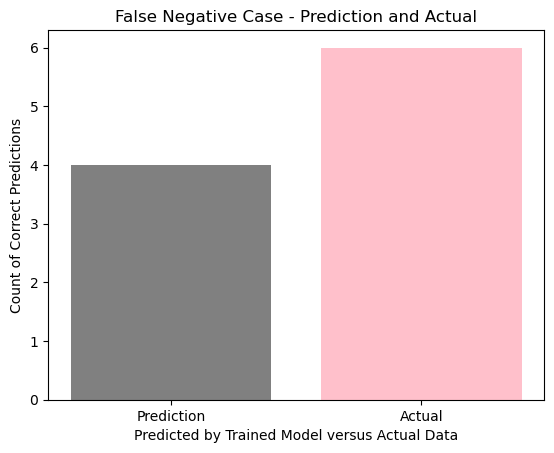

<Figure size 640x480 with 0 Axes>

In [17]:
# False Negative Case

false_negative_case = len(actual_data_predicted[(actual_data_predicted['Prediction'] == 0) & (actual_data_predicted['Actual'] == 1)])

# Count the number of rows where Actual=1 (regardless of Prediction)
actual_false_negative_case = len(actual_data_predicted[(actual_data_predicted['Prediction'] == 1) & (actual_data_predicted['Actual'] == 0)])

# Create a bar graph with two bars
categories = ['Prediction', 'Actual']
counts = [false_negative_case, actual_false_negative_case]

plt.bar(categories, counts, color=['grey', 'pink'])
plt.xlabel('Predicted by Trained Model versus Actual Data')
plt.ylabel('Count of Correct Predictions')
plt.title('False Negative Case - Prediction and Actual')
plt.show()

plt.savefig("static/false_negative_case.png")

['No Heart Disease', 'Heart Disease']
[0 1]


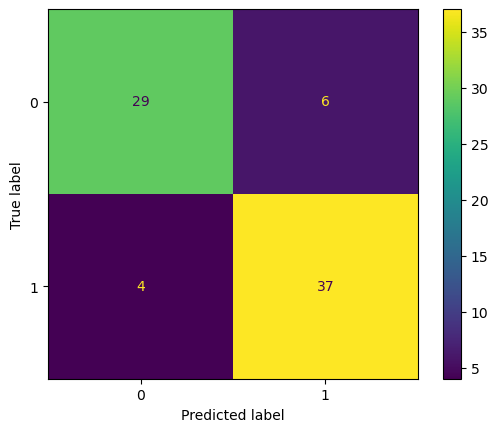

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
print(class_names)
print(model.classes_)
plt.show()


In [19]:
#Coefficient
model.feature_names_in_
#model.coef_

array(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'], dtype=object)

In [20]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

print(report)

Test Acc: 0.868
                  precision    recall  f1-score   support

No Heart Disease       0.88      0.83      0.85        35
   Heart Disease       0.86      0.90      0.88        41

        accuracy                           0.87        76
       macro avg       0.87      0.87      0.87        76
    weighted avg       0.87      0.87      0.87        76



Save Trained Model in Pickle format ready for Deploment

In [21]:

filename = 'svc_finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))


In [22]:
# Without configuration
model.opimizer=None
model.compiled_loss= None
model.compiled_metrics = None
joblib.dump(model,"final_prediction_model.h5")

['final_prediction_model.h5']

Load Trained Model

In [23]:
# load the Svc linear trained model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.868421052631579
